# Empirical exploration of support vectors classifiers

The egg-yoke dataset is not linearly separable. In order to make it linearly separable several data transformations $\phi$ can be performed:
- polar coordinates $\phi(x_1, x_2)= (\rho, \theta)$
- add a dimension: $\phi(x_1, x_2) = (x_1, x_2, x_1^2+x_2^2)$
- change a dimension: $\phi(x_1, x_2) = (x_1, x_1^2+x_2^2)$

You will have two (or more) versions of this dataset: with and without transformation.

### Questions:
1. Apply a the sklearn SVC classifier with a linear kernel to the transformed version of the dataset and an (rbf or poly) kernel to the transformed version of the data. Compare results.
2. Identify the attributes of SVC class that would allow you to reconstruct the decision functions: $y(\mathbf{x}) = \sum_{i=1}^m a_i t_i k(\mathbf{x}, \mathbf{x}_i) + w_0$
3. Plot the decision functions you reconstructed.

In [2]:
# Importing the data
import pandas as pd
test_data = pd.read_csv("../data/eggyoke_testdata.csv")
X_test = test_data[["x_1", "x_2"]]
y_test = test_data["y"]

train_data = pd.read_csv("../data/eggyoke_traindata.csv")
X_train = train_data[["x_1", "x_2"]]
y_train = train_data["y"]

## Data vizualisation

<Axes: xlabel='x_1', ylabel='x_2'>

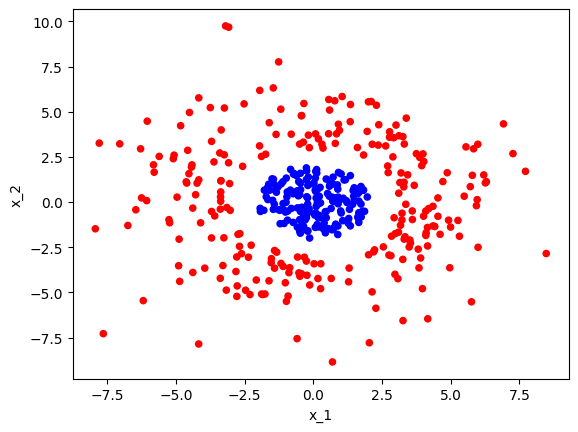

In [3]:
%matplotlib inline
X_concat = pd.concat((X_test, X_train)).reset_index(drop=True)
y_concat = pd.concat((y_test, y_train)).reset_index(drop=True)
col = {-1:"r", 1:"b"}
X_concat.plot.scatter(x='x_1', y='x_2', c=[col[e] for e in y_concat])

# Question 1

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0;">
Because the eggyoke dataset is not linearly separable in the original 2 dimension space we will use a transformation to map our data in a higher dimension space. 

For this, we will use a transformation among all the one possible.  
With the function $\phi(x_1, x_2) = (x_1, x_2, x_1^2+x_2^2)$

This transformation transform the input space to make the previously inseparable classes become <b>linearly separable in the transformed feature space
</div>


In [4]:
# Adding a dimension:
import numpy as np

def phi_add(df):
    x1 = df['x_1'].values.reshape(-1, 1)
    x2 = df['x_2'].values.reshape(-1, 1)
    # New feature:
    x1_x2_pow2 = (df['x_1']**2 + df['x_2']**2).values.reshape(-1, 1)
    return np.hstack((x1, x2, x1_x2_pow2))

In [5]:
# We apply the feature mapping to the training data
X_train_prime = phi_add(X_train)
X_train_prime[:10]

array([[ 3.19185231,  1.61520706, 12.79681503],
       [-3.29405157, -3.51024538, 23.1725984 ],
       [-6.06957377,  0.08177116, 36.84641233],
       [-3.3688651 ,  1.17682108, 12.73415989],
       [ 0.69472742, -8.84492273, 78.71530437],
       [-3.95324097, -3.65440399, 28.98278273],
       [-0.92071131, -5.19929892, 27.88041859],
       [ 4.01040854, -0.77811117, 16.68883364],
       [-0.32605768, -3.04999207,  9.40876524],
       [ 4.35518546, -1.31769043, 20.70394848]])

### Post transformation visualization

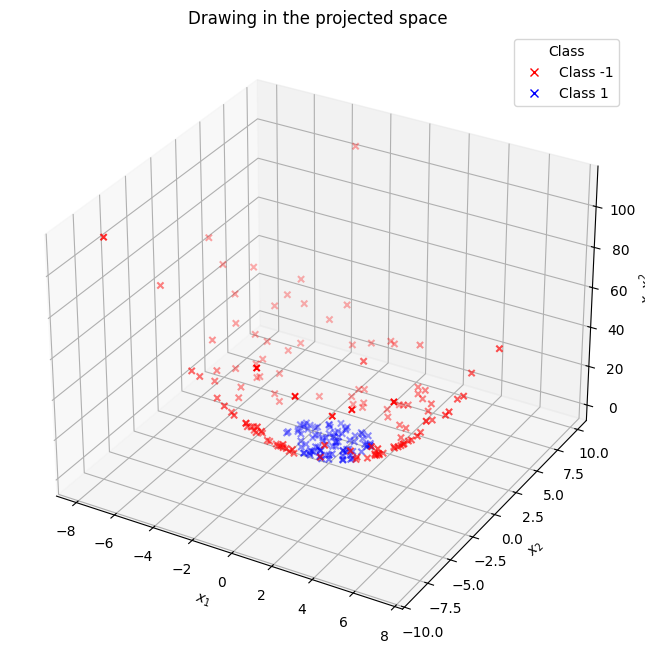

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#Preparation of the data
X_df = pd.DataFrame(X_train_prime, columns=['x_1', 'x_2', 'x_1x_2power'])

# Class 1 in red (-1), class 2 in blue (1)
col = {-1:"r", 1:"b"}
colors = [col[e] for e in y_train]

# Drawing the 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_df['x_1'], X_df['x_2'], X_df['x_1x_2power'], c=colors, marker='x')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_1x_2^2$')
ax.set_title('Drawing in the projected space')

ax.legend([
    plt.Line2D([0], [0], linestyle="none", c="r", marker = 'x'),
    plt.Line2D([0], [0], linestyle="none", c="b", marker = 'x')
], ['Class -1', 'Class 1'], numpoints = 1, title="Class")

plt.show()

[]

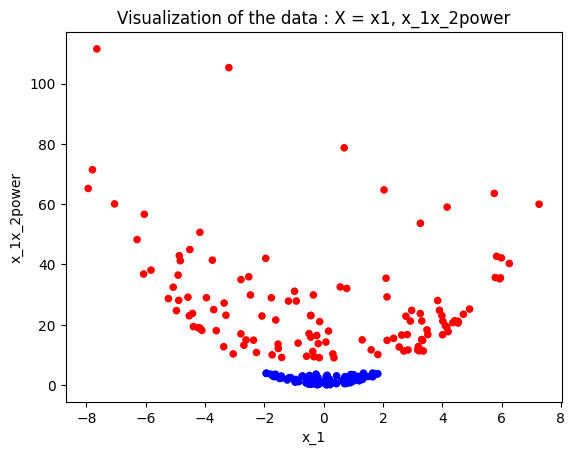

In [7]:
%matplotlib inline
# 2D Visualization of the projected data about x1 and x1x2power

col = {-1:"r", 1:"b"}
ax = pd.DataFrame(X_train_prime, columns=['x_1', 'x_2', 'x_1x_2power']).plot.scatter(x='x_1', y='x_1x_2power', c=[col[e] for e in y_train])
ax.set_title("Visualization of the data : X = x1, x_1x_2power")
ax.plot()

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0;">
This transformation maps the data into a higher-dimensional space where the classes become linearly separable. In this transformed space, the SVC can find an optimal hyperplane to separate the two classes, solving the non-linearity problem of our original data.
</div>


## Other transformation of our data using polar coordinates

In [8]:
from sklearn import svm

def phi_polar(x):
    r = np.sqrt(x["x_1"]**2 + x["x_2"]**2)
    theta = np.arctan(x["x_2"]/x["x_1"])
    return np.c_[r, theta]

X_train_shuffled = X_train.sample(frac=1, random_state=42)
y_train_shuffled = y_train.loc[X_train_shuffled.index]

X_train_polar = phi_polar(X_train_shuffled)

X_train_df = pd.DataFrame(
    X_train_polar,
    columns=['r', 'theta'] 
)

clf_pola = svm.SVC()
clf_pola.fit(X_train_df,  y_train_shuffled)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


[]

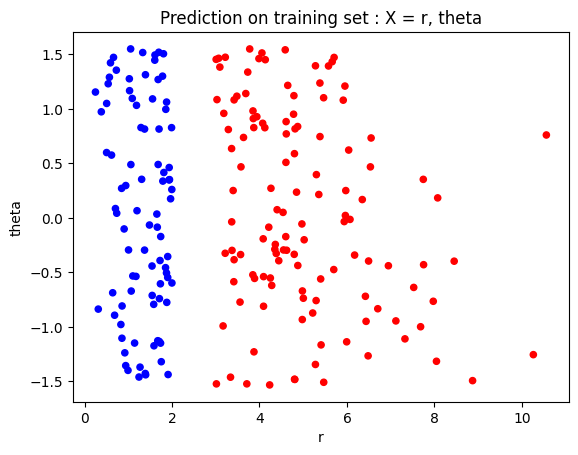

In [9]:
%matplotlib inline

col = {-1:"r", 1:"b"}
ax = X_train_df.plot.scatter(x='r', y='theta', c=[col[e] for e in clf_pola.predict(X_train_df)])
ax.set_title("Prediction on training set : X = r, theta")
plt.plot()

## Fitting model and predicting

### SVC with linear kernel

In [10]:
from sklearn.svm import SVC

# We create here a SVC with linear kernel (dot product), and we fit it with the projected data.
clf_lin = SVC(kernel='linear')
clf_lin.fit(X_train_prime,  y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [11]:
from sklearn.metrics import zero_one_loss

training_prediction = clf_lin.predict(X_train_prime)

# Empirical error on training set using the 0-1 loss
empirical_error_train = zero_one_loss(y_train, training_prediction)
print(f"Empirical error on training set: {empirical_error_train}")

Empirical error on training set: 0.0


## Test error

In [12]:
# Creating new datasets with the added dimension
x_test_prime = phi_add(X_test)

test_prediction = clf_lin.predict(x_test_prime)

# Prediction error on test set using the 0-1 loss
prediction_error = zero_one_loss(y_test, test_prediction)
print(f"Prediction error on test set: {prediction_error}")

Prediction error on test set: 0.0


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0;">
Both errors (empirical and prediction) are evaluated using the 0-1 loss function, which is suitable for binary classification problems. 

The empirical error on the training set is equal to 0 with the linear kernel SVC, which means that all training observations are correctly classified.

The prediction error obtained on the test set is also zero. In the context of our data, this suggests that the model generalizes perfectly to new examples and shows no obvious signs of overfitting.
</div>


### SVD with Radial Basis Function or Polynomial kernel

A linear SVC is only effective on linearly separable data. There is, however, an alternative to manually transforming our data.

Another way to approach the non-linearity problem is to use a kernel SVC, which implicitly projects the data into a higher-dimensional space, similar to the $\phi$ function defined previously.

In our case, we will use a **polynomial** kernel SVC of **degree 2**.

In [13]:
# Choose polynomial kernel of degree 2, C=10 and coef0=1
clf_poly = SVC(kernel='poly', degree=2, C=10, coef0=1)
clf_poly.fit(X_train.values,  y_train)

# C = 10 to have a better margin but not too big to avoid overfitting

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",10
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'poly'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",2
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",1
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [14]:
training_prediction = clf_poly.predict(X_train.values)

# Empirical error on training set using the 0-1 loss
empirical_error_train = zero_one_loss(y_train, training_prediction)
print(f"Empirical error on training set: {empirical_error_train}")

Empirical error on training set: 0.0


In [15]:
test_prediction = clf_poly.predict(X_test.values)

# Prediction error on test set using the 0-1 loss
prediction_error = zero_one_loss(y_test, test_prediction)
print(f"Prediction error on test set: {prediction_error}")

Prediction error on test set: 0.0


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0;">
Both errors (empirical and prediction) are evaluated using the 0-1 loss function, because we want to evaluate again a binary classification problem. 

The empirical error on the training set is equal to 0 with the polynomial kernel SVC, which means that all training observations are correctly classified.

The prediction error obtained on the test set is also zero. In the context of our data, this suggests that the model generalizes perfectly to new examples and shows no obvious signs of overfitting.
</div>


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0;">
As we can see, increasing the dimensionality of our data via a transformation and applying a linear SVC gives very similar performance as using a polynomial kernel SVC.

The first algorithm creates manually modified versions of our $x$, such as:


$x \rightarrow \phi(x), \quad (x_1, x_2) \rightarrow (x_1, x_2, x_1^2 + x_2^2)$

The SVC relies on the concepts of **support vectors** and **margin**.  
This is why our algorithm seeks to minimize the following objective function:

$$\min_{w, b, \{\xi_i\}} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{m} \xi_i $$
$$\text{subject to } t_i (w^\top x_i + b) \ge 1 - \xi_i,\space i=1,\dots,m,$$
$$\xi_i \ge 0,\space i=1,\dots,m$$

- **C** indicates how much we penalize prediction errors (between the margin and the decision boundary); in our case, it is set to 1 by default.  
- **w** is the weight vector of the model.
- **$\xi_i$** is the *slack variable*, used to quantify the classification of a point ($\xi_i > 1$ if the point is misclassified)

The second algorithm, using a **polynomial kernel**, implicitly transforms the data into a higher-dimensional space, allowing the SVC to separate the classes linearly **without manually computing the transformed values**.

Finally, on our dataset, the performance remains almost the same, as both approaches rely on different formulations but end up doing similar thing in practice.
</div>

# Question 2 
#### Identify the attributes of SVC class that would allow you to reconstruct the decision functions: $y(\mathbf{x}) = \sum_{i=1}^m a_i t_i k(\mathbf{x}, \mathbf{x}_i) + w_0$.

## Linear SVM

### Finding supports vectors

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0;">
Quick recall on what support vectors are:  
They are the vectors that are closest to the decision boundary and define the margin. 
They are found by maximizing the margin.  
These are the vectors that satisfy the following equation:

$$t_i (w^\top x_i + b) = 1 \quad \text{(or } < 1 \text{  if  } \xi_i > 0\text{)}$$
</div>

In [16]:
## These are the support vectors for the linear SVM
clf_lin.support_vectors_

array([[ 0.34911944,  2.98925145,  9.05750863],
       [-1.413608  , -2.67867567,  9.17359089],
       [-1.92860572, -0.51476904,  3.98450719],
       [ 1.34612353,  1.4665841 ,  3.96291749]])

## Kernel
<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0;">
In the case of a linear SVC, the kernel is the simple dot product between two vectors:  
</div>

$$k(x, y) = \langle x, y \rangle = \sum_{i=1}^n x_i y_i$$


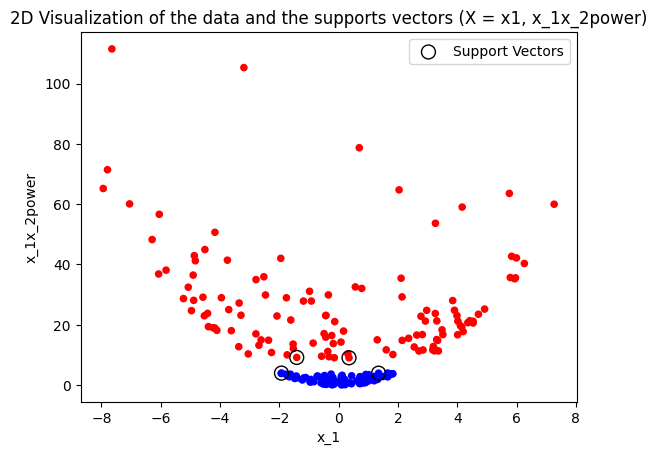

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt

df = pd.DataFrame(X_train_prime, columns=['x_1', 'x_2', 'x_1x_2power'])
ax = df.plot.scatter(x='x_1', y='x_1x_2power', c=[col[e] for e in y_train])
ax.set_title("2D Visualization of the data and the supports vectors (X = x1, x_1x_2power)")

support_vectors = clf_lin.support_vectors_
ax.scatter(support_vectors[:, 0], support_vectors[:, 2], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

ax.legend()
plt.show()

## Finding the coefficient $\alpha_i t_i$

In [18]:
# Now we want to find the coefficients alpha_i t_i for the support vectors
support_vector_labels = y_train.iloc[clf_lin.support_].values

# Reprentation of the alpha coefs
dual_coefs = clf_lin.dual_coef_[0] 

# Alpha_i computation give us how much each support vector influence the decision boundary
alpha_i = dual_coefs * support_vector_labels

print("Dual coefs =", dual_coefs, "Alpha_i =", alpha_i)

Dual coefs = [-0.04303727 -0.03283503  0.0400324   0.0358399 ] Alpha_i = [0.04303727 0.03283503 0.0400324  0.0358399 ]


## Bias $(w_0)$

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0;">
The bias can be compute this way :

where $N_S$ is the total number of support vectors.
</div>

$$b = \frac{1}{N_S} \sum_{n \in S} \left( t_n - \sum_{m \in S} \alpha_m t_m \, k(x_n, x_m) \right)$$

In [19]:
# We can take the intercept term of our linear SVM to get b
b = clf_lin.intercept_[0]

# We can also compute b using the support vectors
def bias(clf):
    # We extract the support vectors, dual coefficients and their labels
    support_vectors = clf.support_vectors_
    dual_coefs = clf.dual_coef_[0]
    support_vector_labels = y_train.iloc[clf.support_].values

    # Computing b
    sum_i = 0
    for i in range(len(support_vectors)):
        sv = support_vectors[i]
        t_i = support_vector_labels[i]
        sum_j = 0
        for j in range(len(support_vectors)):
            dual_coef_j = dual_coefs[j]
            sv_j = support_vectors[j]
            kern = np.dot(sv, sv_j)
            sum_j += dual_coef_j * kern
        sum_i += t_i - sum_j
    sum_i = sum_i / len(support_vectors)
    return sum_i

b_computed = bias(clf_lin)
print("Intercept from SVM class:", b)
print("Computed bias b:", b_computed)

# We notice that both values are similar, which confirms our calculations. The small difference is due to numerical approximations.

Intercept from SVM class: 2.552798168606788
Computed bias b: 2.5527981641761315


## Reconstruct the decision function 
$$y(\mathbf{x}) = \sum_{i=1}^m a_i t_i k(\mathbf{x}, \mathbf{x}_i) + w_0$$

In [20]:
# We can now reconstruct the decision function using the support vectors, alphas and b values.
def decision_function_clf_lin(x):
    support_vectors = clf_lin.support_vectors_
    dual_coefs = clf_lin.dual_coef_[0]
    b = clf_lin.intercept_[0]

    # Computing the linear kernel values
    k_values = np.dot(x, support_vectors.T)

    # Computing the weighted sum of the kernel values
    weighted_sum = np.dot(k_values, dual_coefs)

    return weighted_sum + b

In [21]:
# Let's test this function on a few points to see if it matches the SVC's decision function
test_points = np.array([[0, 0], [1, 1], [-1, -1]])
test_points = phi_add(pd.DataFrame(test_points, columns=['x_1', 'x_2']))

svm_decision_values = clf_lin.decision_function(test_points)
custom_decision_values = decision_function_clf_lin(test_points)

print("SVM decision function values:", svm_decision_values)
print("Custom decision function values:", custom_decision_values)

SVM decision function values: [2.55279817 1.76751584 1.78013799]
Custom decision function values: [2.55279817 1.76751584 1.78013799]


# SVM with polynomial kernel

### Finding supports vectors

In [22]:
# These are the support vectors for the polynomial SVC
support_vector_poly = clf_poly.support_vectors_

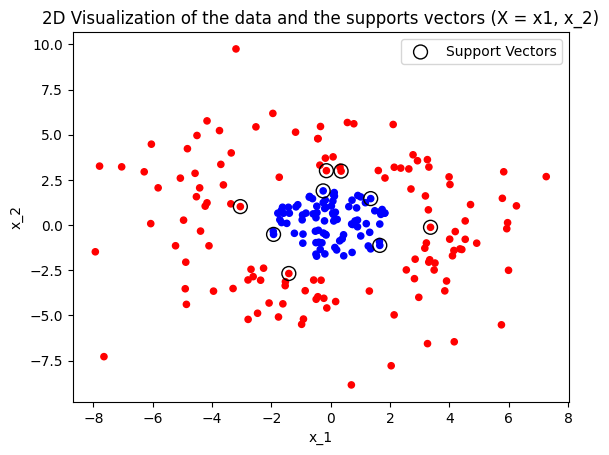

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt

df = pd.DataFrame(X_train, columns=['x_1', 'x_2'])
ax = df.plot.scatter(x='x_1', y='x_2', c=[col[e] for e in y_train])
ax.set_title("2D Visualization of the data and the supports vectors (X = x1, x_2)")

support_vectors = clf_poly.support_vectors_
ax.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

ax.legend()
plt.show()

## Finding the coefficient $\alpha_i t_i$

In [24]:
# Now we want to find the coefficients alpha_i t_i for the support vectors of the polynomial SVC
dual_coefs_poly = clf_poly.dual_coef_[0]

# Support vector labels for the polynomial SVC
support_vector_labels_poly = y_train.iloc[clf_poly.support_].values

# Alpha_i to see how much each support vector influence the decision boundary
alpha_i_poly = dual_coefs_poly * support_vector_labels_poly

## Kernel
<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0;">
In the case of a polynomial SVM of degree d, the kernel is defined as:

$$k(x, y) = (\langle x, y \rangle + c)^d$$

where $c$ is a constant (here $c = 1$) and $d$ is the degree of the polynomial (here $d = 2$).

In our case:
$$k(x, y) = (\langle x, y \rangle + 1)^2$$
$$k(x, y) = (1,\ \sqrt{2}\,x_1,\ \sqrt{2}\,x_2,\ x_1^2,\ \sqrt{2}\,x_1 x_2,\ x_2^2)\ \cdot\ 
(1,\ \sqrt{2}\,y_1,\ \sqrt{2}\,y_2,\ y_1^2,\ \sqrt{2}\,y_1 y_2,\ y_2^2)^T$$

This can be written as:
$$
k(x, y) = \phi(x)^T \phi(y), \quad 
\phi(x) = \big(1,\ \sqrt{2}\,x_1,\ \sqrt{2}\,x_2,\ x_1^2,\ \sqrt{2}\,x_1 x_2,\ x_2^2 \big)
$$
</div>

## Bias $(w_0$)

In [25]:
# The last step is to take the bias term b for the polynomial SVC
b_poly = clf_poly.intercept_[0]

# We can take the intercept term of our polynomial SVM to get b
# The computation of b is similar to the linear case, only the kernel changes
def bias_poly(clf):
    # We found in the class the gamma value for the polynomial kernel
    gamma_val = 1.0 / (X_train.values.shape[1] * X_train.values.var())
    
    # We extract the support vectors, dual coefficients and their labels
    support_vectors = clf.support_vectors_
    dual_coefs = clf.dual_coef_[0]
    support_vector_labels = y_train.iloc[clf.support_].values

    # Computing b using the polynomial kernel
    sum_i = 0
    for i in range(len(support_vectors)):
        sv = support_vectors[i]
        t_i = support_vector_labels[i]
        sum_j = 0
        for j in range(len(support_vectors)):
            dual_coef_j = dual_coefs[j]
            sv_j = support_vectors[j]
            kern_poly_2 = (gamma_val * (np.dot(sv, sv_j)) + 1)** 2
            sum_j += dual_coef_j * kern_poly_2
        sum_i += t_i - sum_j
    sum_i = sum_i / len(support_vectors)
    return sum_i

b_computed = bias_poly(clf_poly)
print("Intercept from SVM:", b_poly)
print("Computed bias b:", b_computed)

# We notice that both values are similar, which confirms our calculations. The small difference is due to numerical approximations.

Intercept from SVM: 2.227273648366267
Computed bias b: 2.23301550073724


## Reconstruct the decision function 
$$y(\mathbf{x}) = \sum_{i=1}^m a_i t_i k(\mathbf{x}, \mathbf{x}_i) + w_0$$

In [26]:
# We can now reconstruct the decision function using the alpha_i and b (w_0) values.

def decision_function_clf_pol(x):
    # We found in the class the gamma value for the polynomial kernel
    gamma_val = 1.0 / (x.shape[1] * X_train.values.var())

    # Getting support vectors, dual coefficients and intercept
    support_vectors = clf_poly.support_vectors_
    alpha_i = clf_poly.dual_coef_[0]
    b = clf_poly.intercept_[0]

    # Computing the polynomial kernel values
    K = ((gamma_val * (np.dot(x, support_vectors.T))) + 1) ** 2
    decision_values = np.dot(K, alpha_i) + b

    return decision_values

In [27]:
# Let's test the decision function
svm_decision_values = clf_poly.decision_function(X_test.values[:10])
custom_decision_values = decision_function_clf_pol(X_test.values[:10])

print("SVM decision function values:", svm_decision_values)
print("Custom decision function values:", custom_decision_values)

SVM decision function values: [-12.75159459  -4.2645791   -0.88548599  -3.22569692  -1.89491054
  -5.81782844 -21.74921925  -4.45951893  -7.07974495 -16.01522528]
Custom decision function values: [-12.75159459  -4.2645791   -0.88548599  -3.22569692  -1.89491054
  -5.81782844 -21.74921925  -4.45951893  -7.07974495 -16.01522528]


# Question 3 - Plot the decision function

# Visualization of the boundary function of the polynomial SVC

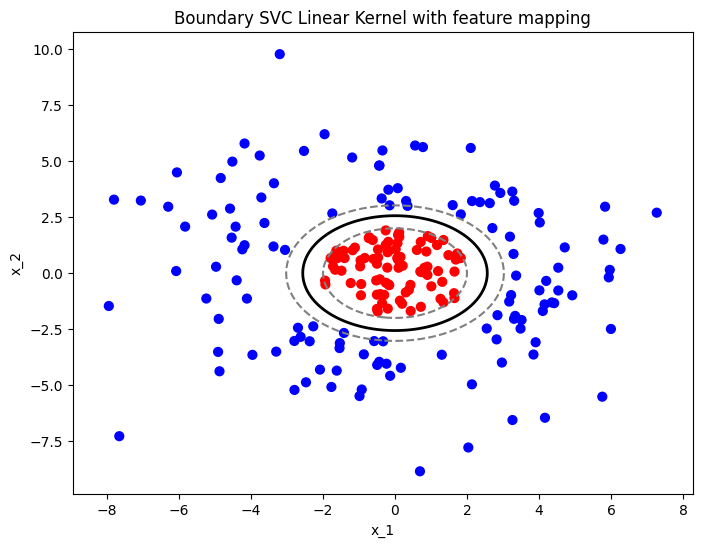

In [28]:
x1 = np.linspace(X_train.values[:,0].min()-1, X_train.values[:,0].max()+1, 200)
x2 = np.linspace(X_train.values[:,1].min()-1, X_train.values[:,1].max()+1, 200)
x, y = np.meshgrid(x1, x2)

z_input = x**2 + y**2
X_grid = np.c_[x.ravel(), y.ravel(), z_input.ravel()]

z = decision_function_clf_lin(X_grid)
z = z.reshape(x.shape)

plt.figure(figsize=(8,6))

plt.scatter(X_train.values[:,0], X_train.values[:,1], c=y_train, cmap='bwr', s=40)
# Keeping the contour lines of the decision function
plt.contour(x1, x2, z, levels=[0], colors='k', linewidths=2)
plt.contour(x1, x2, z, levels=[-1,1], colors='grey', linestyles='--')

plt.title("Boundary SVC Linear Kernel with feature mapping")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()

# Visualization of the polynomial SVC boundary.

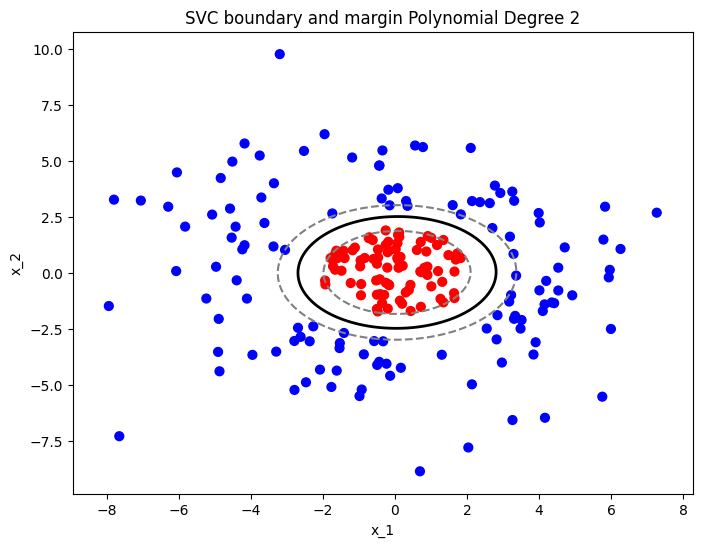

In [29]:
x1 = np.linspace(X_train.values[:,0].min()-1, X_train.values[:,0].max()+1, 200)
x2 = np.linspace(X_train.values[:,1].min()-1, X_train.values[:,1].max()+1, 200)
x, y = np.meshgrid(x1, x2)

grid = np.c_[x.ravel(), y.ravel()]

z = decision_function_clf_pol(grid)
z = z.reshape(x.shape)

plt.figure(figsize=(8,6))

plt.scatter(X_train.values[:,0], X_train.values[:,1], c=y_train, cmap='bwr', s=40)

# Keeping the contour lines of the decision function
plt.contour(x, y, z, levels=[0], colors='k', linewidths=2)
plt.contour(x, y, z, levels=[-1,1], colors='grey', linestyles='--')

plt.title("SVC boundary and margin Polynomial Degree 2")
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()


# Conclusion

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0;">
Finally, show us different approaches to solve a non-linearly separable problem using an SVC. Two options are possible:

**Manual transformation of the data**:  
   We can project our data into a higher-dimensional space where they become linearly separable by a hyperplane, and then apply a standard SVC. But, this approach is computationally expensive in terms of both resources and time.

**Using a kernel**:  
   An SVC with a **polynomial** or RBF kernel allows the transformation into a higher-dimensional space to be computed **automatically**, without manually constructing all the new dimensions. This drastically reduces computation time. This is call the **kernel trick**.

In our case, we chose a polynomial kernel of degree 2, which corresponds to projecting the data into a 6-dimensional space, sufficient to make the classes separable.
</div>